In [1]:
import os
import psutil
import numpy as np  # import auxiliary library, typical idiom
import pandas as pd  # import the Pandas library, typical idiom
from datetime import datetime
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta

from numba import jit

from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.cluster import KMeans  # for clustering
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import mean_absolute_error, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

file_export = 'export2012.csv'
def data_seperation(file_export):
    data = pd.read_csv(file_export)
    df_sorted= data.sort_values(by=['startTime'])
    training_data,testing_data= train_test_split(df_sorted,test_size=0.2, shuffle=False)

In [2]:
def no_overlap(training_data,testing_data):
    for case in training_data['case']:
        for cases in testing_data['case']:
            if case==cases:
                training_data.drop(training_data.loc[training_data['case']==case].index, inplace=True)
                testing_data.drop(testing_data.loc[testing_data['case']==cases].index, inplace=True)

In [4]:
data_seperation(file_export)
data = pd.read_csv(file_export)
df_sorted= data.sort_values(by=['startTime'])
training_data,testing_data= train_test_split(df_sorted.head(100),test_size=0.2, shuffle=False)
training_data

,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
21,173691,A_SUBMITTED,2011/10/01 08:08:58.256,2011/10/01 08:08:58.256,5000,2011/10/01 08:08:58.256,112
...,...,...,...,...,...,...,...
218,173721,W_Nabellen offertes,2011/10/01 11:26:32.199,2011/10/01 11:32:54.371,9000,2011/10/01 11:07:34.279,10939
55,173694,W_Completeren aanvraag,2011/10/01 11:31:25.301,2011/10/01 11:35:59.637,7000,2011/10/01 08:10:30.287,10912
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
25,173691,W_Completeren aanvraag,2011/10/01 11:37:32.393,2011/10/01 11:43:13.178,5000,2011/10/01 08:08:58.256,112


In [ ]:
#no_overlap(training_data,testing_data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


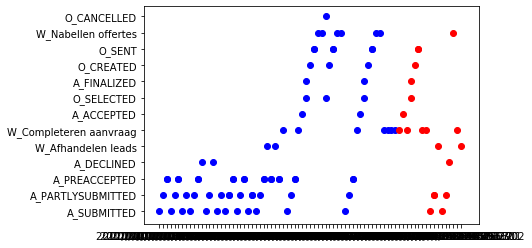

In [5]:
import matplotlib.pyplot as plt
plt.scatter(training_data['startTime'],training_data['event'],c='blue')
plt.scatter(testing_data['startTime'],testing_data['event'],c='red')

plt.show()